## 2.1 ***Activation Functions***
___

Having understood how neural networks use weights and biases to perform calculations, it's time to explore how they introduce non-linearity and complexity into these computations. This is where **activation functions** come into play.

Let's take a look at the neurone formula:

Given a neurone 𝑖, its output $y_i$ is calculated by:

### $y_i = \phi\left(\sum_{j=1}^{n} w_{ij} x_j + b_i\right)$


Where:

- $x_j$ are the input values to the neuron.
- $w_{ij}$ are the weights associated with the inputs.
- $b_i$ is the bias term for the neuron.
- $\sum_{j=1}^{n} w_{ij} x_j$ is the weighted sum of the inputs.
- $\phi(\cdot)$ is **the activation function** applied to the weighted sum.

## But what exactly is an activation function?

In neural networks, an activation function is a mathematical function applied to the output of a neuron, introducing non-linearity into the model (think of linearity as $y = ax + b$ , aka a straight line). This non-linearity enables the network to capture and represent complex patterns in the data—something that would be impossible if the network performed only linear transformations. Without activation functions, even with multiple layers, the network would essentially act as a linear regression model, limited to modeling linear relationships.

The activation function determines whether a neuron should be "activated". By applying a non-linear transformation, the activation function enables the neuron to contribute to learning complex, non-linear mappings between input and output.

If a neural network used only linear transformations (through matrix multiplications and additions), stacking multiple layers would still result in a model that outputs a linear function of its inputs. The non-linear activation function is therefore essential for the network’s ability to approximate intricate, real-world patterns.

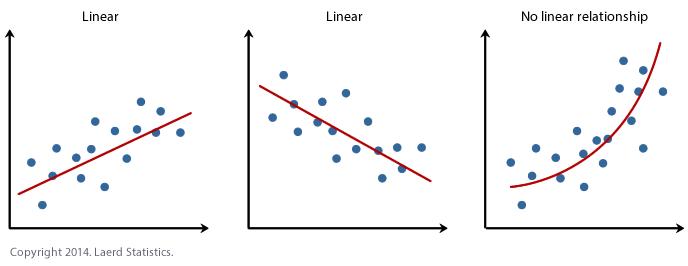

## An activation function's arch-nemesis

The worst enemy of an activation function is the **vanishing gradient problem**.

This occurs when gradients, which are used to update the weights during backpropagation, become extremely small as they propagate through the layers of a neural network. As a result, the network learns very slowly or even stops learning altogether.

The exploding gradient problem is another major challenge in training deep neural networks.

It occurs when gradients become excessively large during backpropagation, leading to unstable training and potentially causing the network's weights to diverge.

*We will cover gradients later, for now just remember that they indicate the corrections to make while training a model :)*

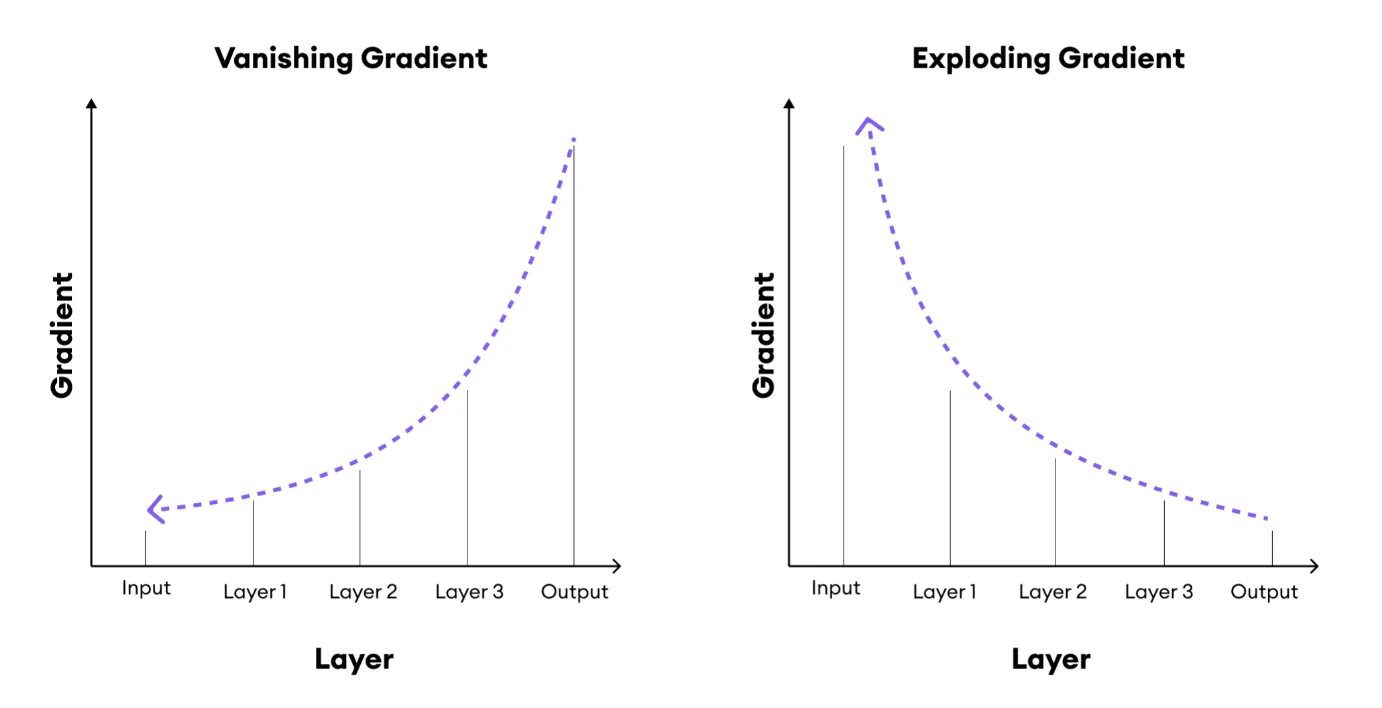

In [ ]:
from matplotlib import pyplot
from numpy import exp

# define input data
inputs = [x for x in range(-10, 10)]

# just run this code for initialisation 

## Choosing an activation function

Here is a non-exhaustive list of some very common activation functions, their common usage and their respective formulas:

***Your goal is to try to recreate each function mathematically and plot it to have the same graph as the example above !***
- **Sigmoid:**

    The Sigmoid Function, can process any real-valued number and map it between 0 and 1. This mapping makes it useful in binary classification problems in machine learning, where the output is modeled as a probability.
$$\sigma(x) = \frac{1} {1 + e^{-x}}$$ 
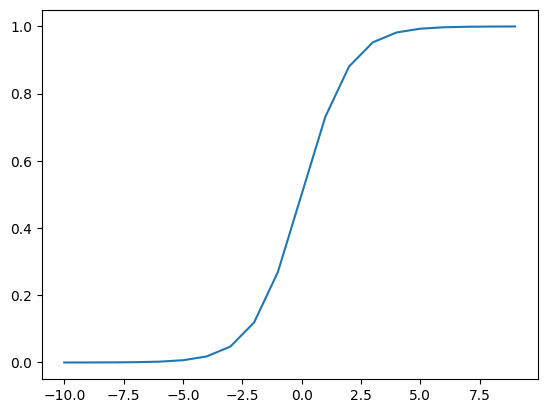


In [ ]:
def sigmoid(x):
    # TODO: Implement the sigmoid function
    return ...

sigmoid_outputs = [sigmoid(x) for x in inputs]

print("SIGMOID FUNCTION")
pyplot.plot(inputs, sigmoid_outputs)
pyplot.show()


___
- **Tanh (Hyperbolic Tangent):**

    Historically, the tanh function became preferred over the sigmoid function as it gave better performance for multi-layer neural networks. But it did not solve the vanishing gradient problem that sigmoids suffered, which was tackled more effectively with the introduction of ReLU activations.
$$tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} = \frac{1 - e^{-2x}}{1 + e^{-2x}}$$

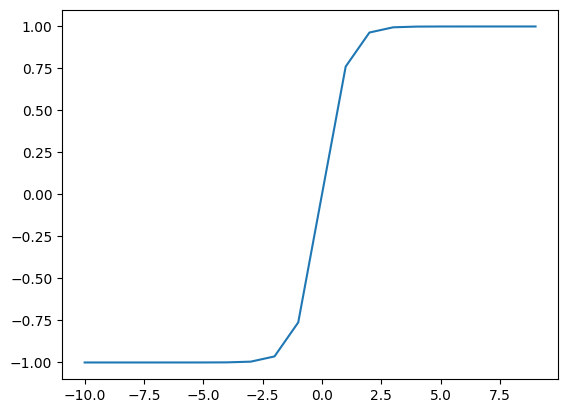

In [ ]:
def tanh(x):
    # TODO: Implement the tanh function
    return ...

tanh_outputs = [tanh(x) for x in inputs]
print("TANH FUNCTION")
pyplot.plot(inputs, tanh_outputs)
pyplot.show()

___
- **ReLU (Rectified Linear Unit):**

    In recent years, the Rectified Linear Unit (ReLU) has surpassed the Sigmoid Function in popularity as an activation function in neural networks. ReLU has improved results regarding the vanishing gradient issue, scales well with large networks, and provides faster computation due to its simpler formula.
$$ReLU(x) = max(0, x)$$
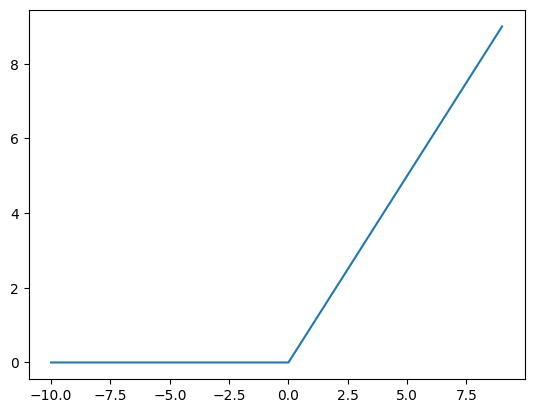

In [ ]:
def relu(x):
    # TODO: Implement the relu function
    return ...

relu_outputs = [relu(x) for x in inputs]
print("RELU FUNCTION")
pyplot.plot(inputs, relu_outputs)
pyplot.show()

___
- **Leaky ReLU:**

    While ReLU is a significant improvement over traditional activation functions like sigmoid and tanh, it still has limitations when dealing with very deep neural networks. If the input to a ReLU neuron is negative, its output is zero. If this happens repeatedly, the neuron can become "dead" and never activate again. This can prevent the neuron from learning and contributing to the network's performance.
    To address these issues, researchers have developed various techniques, such as Leaky ReLU which introduces a small slope for negative inputs, preventing neurons from becoming completely dead.
$$LeakyReLU(x) = max(alpha * x, x)$$

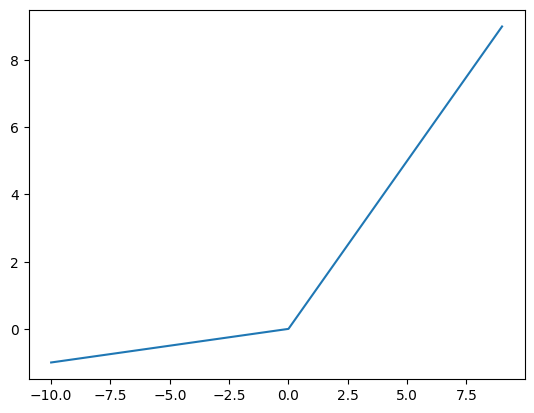

In [ ]:
def leaky_relu(x): # we'll use alpha = 0.1
    # TODO: Implement the leaky_relu function
    return ...

leaky_relu_outputs = [leaky_relu(x) for x in inputs]
print("LEAKY_RELU FUNCTION")
pyplot.plot(inputs, leaky_relu_outputs)
pyplot.show()

___
- **Softmax:**

    The Softmax function is an activation function commonly used in the output layer of a neural network for multi-class classification problems. It takes a vector of real numbers as input and normalizes it into a probability distribution, where the sum of the probabilities equals 1.
    For example, the standard softmax of (1,2,8) is approximately (0.001, 0.002, 0.997), which amounts to assigning almost all of the total unit weight in the result to the position of the vector's maximal element (of 8).
    The Softmax function is defined as follows:
$$\sigma(x_i) = \frac{e^{x_{i}}}{\sum_{j=1}^K e^{x_{j}}} \ \ \ for\ i=1,2,\dots,K$$

In [ ]:
softmax_inputs = [1.0, 3.0, 2.0]

def softmax(x): # we'll print this one, not plot it
    # TODO: Implement the softmax function
    return ...

softmax_outputs = softmax(softmax_inputs)
print("SOFTMAX FUNCTION")
print(softmax_outputs)
assert softmax_outputs.sum() == 1.0

### Now what exactly are we using the activation functions for ?

The choice of activation function has a large impact on the capability and performance of the neural network, and different activation functions may be used in different parts of the model.

A network may have three types of layers: **input layers** that take raw input from the domain, **hidden layers** that take input from another layer and pass output to another layer, and **output layers** that make a prediction.

All hidden layers typically use the same activation function. The output layer will typically use a different activation function from the hidden layers and is dependent upon the type of prediction required by the model.


There are perhaps three activation functions you may want to consider for use in the output layer; they are:

- **Linear:** typically $f(x) = x$
- **Sigmoid:** useful for binary classification
- **Softmax:** useful for assigning probability scores, it's the one used by transformers (i.e. ChatGPT)

This is not an exhaustive list of activation functions used for output layers, but they are the most commonly used.

___
# ***Bonus***

### Let's try to visualize the impact that an activation function can have on the training of a model:

The goal of this activity is to try to reproduce the vanishing gradient problem.

The following code generates two distinct groups of data points in the shape of moon crescents. It then constructs a neural network which will be trained on differentiating if a data point belongs to one moon or the other.

Your job is to launch the code and see if the loss is decreasing during epochs. You might observe little to no changes in the loss value, in which case you probably are looking at a vanishing gradient problem. Can you figure out how to fix it ? (Keep in mind, since there is randomization you may have to give it multiple tries.)



In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons # classification datasets
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

X,y = make_moons(n_samples=250, noise=0.05, random_state=42) # create our 2 moons

plt.scatter(X[:,0],X[:,1], c=y, s=100)
plt.show()


# constructing a complex neural network with two inputs and nine layers with 10 nodes
model = Sequential()

# takes the coordinates x and y of a data point as an input
model.add(Dense(10, activation='sigmoid',input_dim=2))

model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))

# the output also uses a sigmoid activation function since it is suitable for binary classification (0-0.5 and 0.5-1)
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.get_weights()[0]

old_weights = model.get_weights()[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model.fit(X_train, y_train, epochs = 300)

new_weights = model.get_weights()[0]